# Think Like a Machine - Chapter 7
Neural Networks
===============

**ACKNOWLEDGEMENT**

**The MNIST data loader is adapted from https://github.com/sorki/python-mnist/blob/master/mnist/loader.py. Also stole  ideas and code from Sonya Sawtelle's excellent blog at http://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html.**

In this notebook we're going to use neural networks in the SciKit Learn library to learn how to classify two datasets.  Instead of learning how to implement neural networks from scratch we're going to use off-the-shelf neural networks. But we're going to learn how a neural network works by probing its behavior in various ways. 

The first dataset is the one we used in the non-linear logistic regression notebook.

The second dataset is quite well known - it's a handwritten set of digits -- a bunch of images from a famous dataset called MNIST (http://yann.lecun.com/exdb/mnist/). Let's start with the MNIST dataset.

In [1]:
# Get access to the MNIST class defined in mnist_loader.py
# mnist_loader.py contains methods for loading and displaying the MNIST data
%run mnist_loader.py

In [2]:
# Import our usual libraries
from __future__ import division 
import numpy as np
from numpy import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os

## The Problem

Handwriting is messy. Can we decipher hand-written digits? 

## Load the MNIST Data

We'll adapt a package from GitHub that allows us to read the second dataset and display the images in it.

In [3]:
# Initialize the mnist object
mnist = MNIST()
type(mnist)

__main__.MNIST

In [4]:
# Get the testing images and labels
test_images, test_labels = mnist.load_testing()

In [5]:
type(test_images), type(test_labels)

(list, array.array)

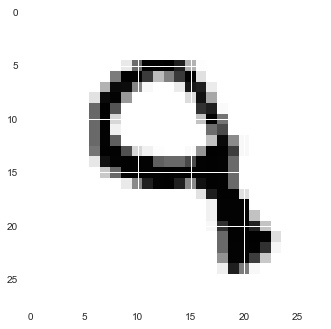

In [6]:
mnist.display(test_images[4000])

In [7]:
# Get the training images and labels
train_images, train_labels = mnist.load_training()

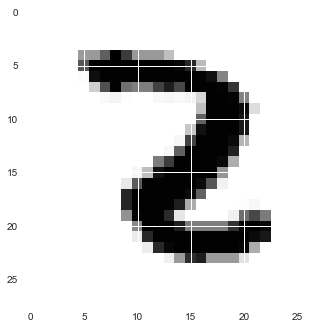

In [8]:
mnist.display(train_images[3390])

In [9]:
# How many images and labels in the training and test datasets?
[len(d) for d in [train_images, train_labels, test_images, test_labels]]

[60000, 60000, 10000, 10000]

In [10]:
# Size of the datasets
[np.array(d).shape for d in [train_images, train_labels, test_images, test_labels]]

[(60000, 784), (60000,), (10000, 784), (10000,)]

In [11]:
# How many unique digits do we have handwriting examples for?
list(set(test_labels))

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [12]:
# Finally, extract the data as inputs to the neural network classifier.
# Scale the data and one-hot encode the labels
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()

X_train = np.array(train_images)/255 # rescale to values between 0 and 1
# One-hot encode
y_train = enc.fit_transform(np.array(train_labels).reshape(-1,1)).toarray()

X_test = np.array(test_images)/255 # rescale
# One-hot encode
y_test = enc.fit_transform(np.array(test_labels).reshape(-1,1)).toarray()

In [13]:
y_train[2000]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

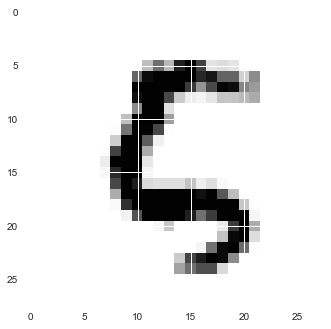

In [14]:
# Check the one-hot encoding
mnist.display(X_train[2000])

In [141]:
# We need a multi-level classifier because we have to classify digits into 0 through 9 distinct classes.

from sklearn.neural_network import MLPClassifier
# Hidden layers are specified as follows
# (n1, ) means n1 units and 1 hidden layer
# (n1, n2) means n1 units in the first hidden layer and n2 units in the second hidden layer
# (n1, n2, n3) maeans n1 units in the first hidden layer, n2 units in the second hidden layer,
#    and n3 units in the third hidden layer
# Experiment with max_iter -- set it to 10, 50, 100, 200 to see how the neural network behaves
clf = MLPClassifier(solver='sgd', alpha=1e-5,
                    hidden_layer_sizes=(25, 25), random_state=1, verbose=False, max_iter=50)

clf.fit(X_train, y_train) 

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=50, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='sgd', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

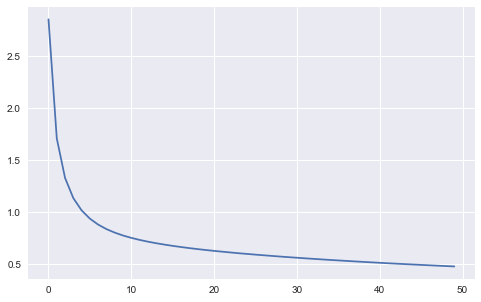

In [126]:
# How quickly is the classifier learning?
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(clf.loss_curve_)

In [17]:
# The classifier's predictions for the first 5 images in the test dataset
clf.predict(X_test[0:5])

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0, 0, 0]])

When the number of learning iterations is low, the model will often not make any predictions. You'll see all zeros in some or most of the arrays above. Sometimes you'll see multiple ones appear in a row -- that shows the classifier is (eerie!) confused about what number it is and makes a couple of best guesses. 

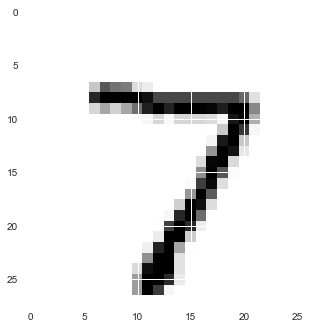

In [18]:
# Check if the first prediction read off from the one-hot encoding in the first list above
#  matches with the classifier's prediction
mnist.display(test_images[0])

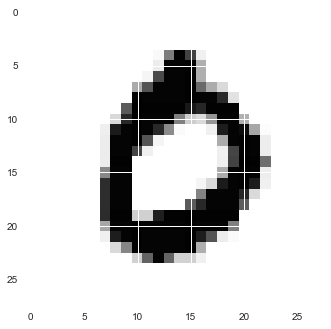

In [19]:
mnist.display(test_images[3])

In [130]:
# Select n_sel random images from the test dataset -- we have 10,000 test images in total (see above)
n_total = 10000
n_sel = 10
test_image_ids = rnd.choice(range(0,n_total - 1), n_sel, replace=False)

# for each of these image ids, get the test image
test_images_sel = [X_test[i] for i in test_image_ids]

# for each of these image ids, get the result from the classifier
clf.predict(test_images_sel)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
       [0, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

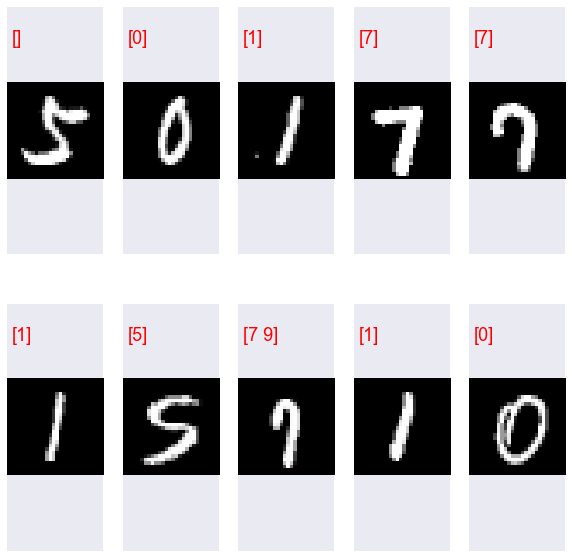

In [131]:
# Now show these randomly selected test images and our neural net classifier's prediction based on its training
# Adapted from Sonya Sawtelle
# http://sdsawtelle.github.io/blog/output/week4-andrew-ng-machine-learning-with-python.html
fig, axs = plt.subplots(2, 5, sharex=True, sharey=True, figsize=(10,10)) 
axs = axs.flatten()  # The returned axs is actually a matrix holding the handles to all the subplot axes objects
graymap = plt.get_cmap("gray")

for i, indx in enumerate(test_image_ids):
    im_mat = np.reshape(test_images_sel[i], (28, 28))
    labl = str(np.where(clf.predict(test_images_sel[i].reshape(1, -1))[0] == 1)[0])  
    
    # Plot the image along with the label it is assigned by the fitted model.
    axs[i].imshow(im_mat, cmap=graymap, interpolation="None")
    axs[i].annotate(labl, xy=(0.05, 0.85), xycoords="axes fraction", color="red", fontsize=18)
    axs[i].xaxis.set_visible(False)  # Hide the axes labels for clarity
    axs[i].yaxis.set_visible(False) 

That's close to perfect, but just a small sample of the test dataset. But not bad for just using a pretty basic neural network. How does the classifier do over the entire dataset?

In [22]:
# How well does the classifer perform?
print("Training set score: %f" % clf.score(X_train, y_train))
print("Test set score: %f" % clf.score(X_test, y_test))

Training set score: 0.935600
Test set score: 0.926000


In [23]:
# Misclassification of the test dataset
# Get all the results in terms of success or failure
results = [(clf.predict(X_test[i].reshape(1,-1)) == y_test[i]).all() for i in range(len(X_test))]
# Get the index numbers of all the failures
idx_failures = [i for i, x in enumerate(results) if x == False]

# At the same time, get the index numbers of all the successful predictions
idx_successes = [i for i, x in enumerate(results) if x == True]

In [24]:
# Quick check on test images that are not classified correctly
idx_failures[0:5]

[8, 63, 111, 115, 124]

[[0 0 0 0 0 0 0 0 0 0]]
[[0 0 1 1 0 0 0 0 0 0]]
[[0 1 0 0 0 0 0 1 0 0]]


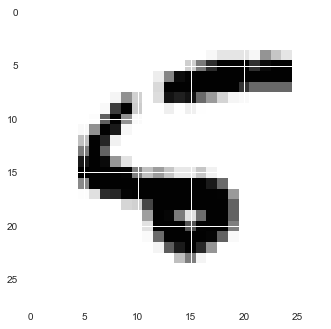

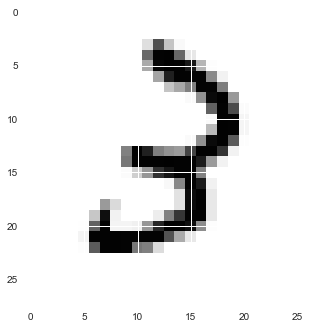

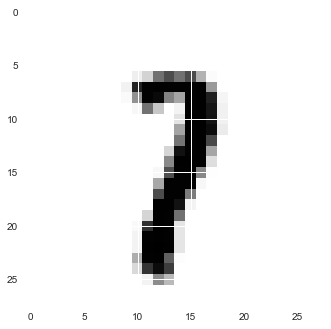

In [122]:
# Let's check on the misclassification for the first few failures
for i in idx_failures[0:3]:
    print clf.predict(X_test[i].reshape(1,-1))
    plt.figure()
    mnist.display(X_test[i])

We can see the kind of mistakes the classifier is making. Let's be systematic and figure out if there's a way in which the classifier is prone to making mistakes. One way to investigate this is to look at every digit in the test set and see how the classifier fails to identify that digit. 

In [26]:
# The classifier's failure patterns
combined_errors_labels = []
for i in idx_failures:
    pred = clf.predict(X_test[i].reshape(1,-1))
    pred_value = np.where(pred[0] == 1)[0]
    if pred_value.size == 0:
        pred_value = [10] #  NOTE: 10 means no prediction is made
    label = y_test[i]
    label_value = np.squeeze(np.where(label == 1)[0]) #np.squeeze to make into an integer
    combined_values = [pred_value, label_value]
    combined_errors_labels.append(combined_values)

In [27]:
# The classifier's success patterns
combined_success_labels = []
for i in idx_successes:
    pred = clf.predict(X_test[i].reshape(1,-1))
    pred_value = np.where(pred[0] == 1)[0]
    # This if clause will never fire...
    if pred_value.size == 0:
        pred_value = [10] #  NOTE: 10 means no prediction is made
    label = y_test[i]
    label_value = np.squeeze(np.where(label == 1)[0]) #np.squeeze to make into an integer
    combined_values = [pred_value, label_value]
    combined_success_labels.append(combined_values)

In [28]:
combined_success_labels[0:5]

[[array([7]), array(7)],
 [array([2]), array(2)],
 [array([1]), array(1)],
 [array([0]), array(0)],
 [array([4]), array(4)]]

In [29]:
# Get the count of successes by digit
# NOTE: This would be much easier if the data were in a Pandas dataframe. Alas...
# Create a list of indexed variables
correct_classified_0 = []
correct_classified_1 = []
correct_classified_2 = []
correct_classified_3 = []
correct_classified_4 = []
correct_classified_5 = []
correct_classified_6 = []
correct_classified_7 = []
correct_classified_8 = []
correct_classified_9 = []

outcomes = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

for i in range(len(outcomes)):
    eval('correct_classified_'+ outcomes[i]).append(combined_success_labels.count([[i], [i]]))

In [30]:
correct_classified_0

[947]

In [31]:
combined_errors_labels[0:5]

[[[10], array(5)],
 [array([2, 3]), array(3)],
 [array([1, 7]), array(7)],
 [[10], array(4)],
 [array([4]), array(7)]]

In [32]:
# NOTE: 10 means no prediction is made
from tabulate import tabulate
headers = ['Classfier Predicts', 'Actual Value']
print tabulate(combined_errors_labels[0:10], tablefmt='grid', headers=headers)

+----------------------+----------------+
| Classfier Predicts   |   Actual Value |
+======================+================+
| [10]                 |              5 |
+----------------------+----------------+
| [2 3]                |              3 |
+----------------------+----------------+
| [1 7]                |              7 |
+----------------------+----------------+
| [10]                 |              4 |
+----------------------+----------------+
| [4]                  |              7 |
+----------------------+----------------+
| [10]                 |              4 |
+----------------------+----------------+
| [10]                 |              2 |
+----------------------+----------------+
| [8]                  |              9 |
+----------------------+----------------+
| [2 3]                |              3 |
+----------------------+----------------+
| [10]                 |              9 |
+----------------------+----------------+


In [33]:
# When the actual value is 0, 1, 2, ..., 9 what are the different ways in which the classifier misclassifies?

# Create a list of indexed variables
misclassified_0 = []
misclassified_1 = []
misclassified_2 = []
misclassified_3 = []
misclassified_4 = []
misclassified_5 = []
misclassified_6 = []
misclassified_7 = []
misclassified_8 = []
misclassified_9 = []

# error_sets = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
# Use outcomes from above instead

# NOTE: eval is considered dangerous - REFACTOR to eliminate
for i in range(len(outcomes)):
    for j in range(len(combined_errors_labels)):
        if combined_errors_labels[j][1] == i:
            eval('misclassified_'+ outcomes[i]).append(combined_errors_labels[j][0])

In [34]:
# Calculate the labeling success rate by digit
for i in range(len(outcomes)):
    n_correctly_classified = eval('correct_classified_'+ outcomes[i])[0]
    n_misclassified = len(eval('misclassified_'+ outcomes[i]))
    success_rate = n_correctly_classified/(n_correctly_classified + n_misclassified)
    print("Success rate for labeling digit %i is %f" %(i, success_rate))

Success rate for labeling digit 0 is 0.966327
Success rate for labeling digit 1 is 0.974449
Success rate for labeling digit 2 is 0.927326
Success rate for labeling digit 3 is 0.908911
Success rate for labeling digit 4 is 0.917515
Success rate for labeling digit 5 is 0.891256
Success rate for labeling digit 6 is 0.949896
Success rate for labeling digit 7 is 0.924125
Success rate for labeling digit 8 is 0.890144
Success rate for labeling digit 9 is 0.900892


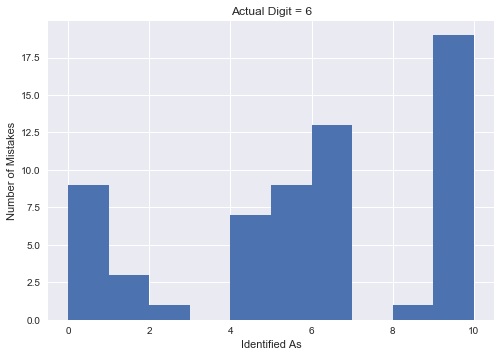

In [35]:
# Histogram of how a digit is misclassified
digit = misclassified_6
hist_data = [item for sublist in digit for item in sublist]
plt.hist(hist_data)
plt.xlabel('Identified As')
plt.ylabel('Number of Mistakes')
plt.title('Actual Digit = 6')
#plt.xticks(range(0,11,1))

In [36]:
# Making it easier using Sonya Sawtelle's code
misclassified = [misclassified_0, misclassified_1, misclassified_2, 
                 misclassified_3, misclassified_4, misclassified_5, 
                 misclassified_6, misclassified_7, misclassified_8, 
                 misclassified_9]

In [37]:
len(misclassified)

10

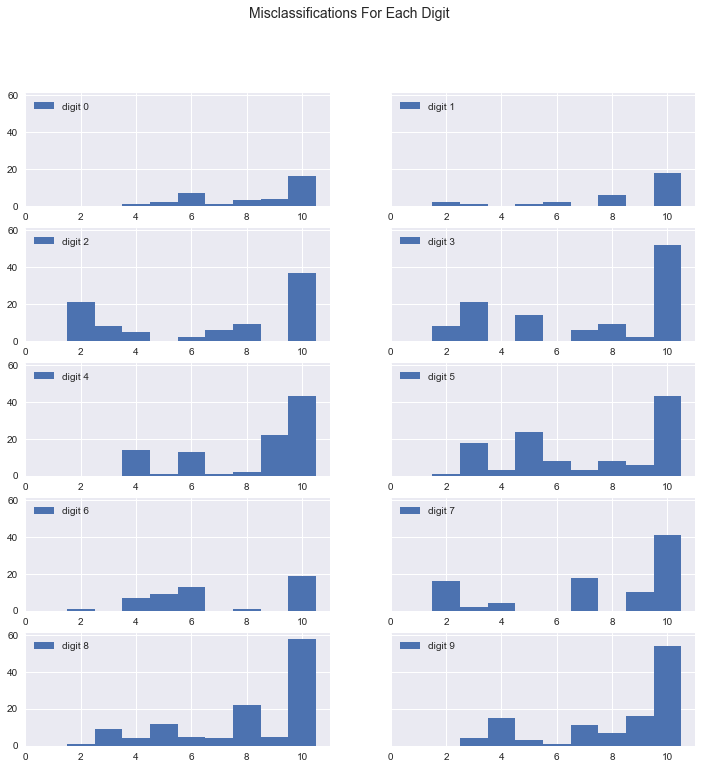

In [38]:
# Code from Sonya Sawtelle
fig, axs = plt.subplots(5, 2, sharex=False, sharey=True, figsize=(12,12))
fig.suptitle("Misclassifications For Each Digit", fontsize=14)
axs = axs.flatten()

for i in range(len(misclassified)):
    ax = axs[i] # not sure what this does but it's required
    digit = misclassified[i]
    hist_data = [item for sublist in digit for item in sublist]
    ax.hist(hist_data, label=("digit %i" %i), bins=np.arange(1, 11, 1)+0.5)  # Shift the bins to get labels aligned
    ax.set_xlim([0, 11])
    #ax.xticks(range(0,11))
    ax.legend(loc="upper left")
    ax.yaxis.set_visible(True)

Note: When you see a digit misidentified as itself, what that means is that the classifier was unsure and made more than one guess, including a guess that it was the digit itself. Because the classifier was not sure, we count this as a misclassification.

The digits 0 and 1 are the easiest to recognize while 5 and 8 seem to be confused with a wide range of other digits. 9 is also hard to discern correctly. 

## Getting Under the Hood

In [40]:
[clf.score(X_train, y_train), clf.score(X_test, y_test)]

[0.93559999999999999, 0.92600000000000005]

In [41]:
clf.loss_

0.26531915606642659

### What does a neuron in a hidden layer "see"?

In [42]:
clf.coefs_[2].shape

(25, 10)

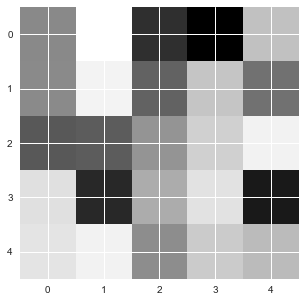

In [140]:
# Pull the weights of a given neuron in a given activation layer
# 
hidden_2 = np.transpose(clf.coefs_[1])[2]
fig, ax = plt.subplots(1, figsize=(5,5))
ax.imshow(np.reshape(hidden_2, (5,5)), cmap=plt.get_cmap("Greys"), aspect="auto", interpolation="nearest")

In [44]:
clf.coefs_[1].shape

(25, 25)

In [45]:
np.matrix(X_test[0]).shape

(1, 784)

In [46]:
# The first hidden layer's activation values.
# Note that the index on X_test can be any value -- it picks an image from the test dataset
layer1_act_vals = (np.matrix(X_test[500]) * clf.coefs_[0]).T

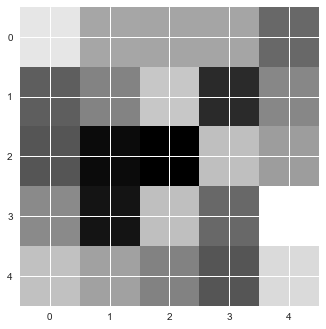

In [47]:
plt.imshow(layer1_act_vals.reshape(5,5))

In [48]:
clf.intercepts_

[array([ 0.44884535, -0.03173984,  0.47907851, -0.08172733,  0.06585324,
         0.15411041,  0.01187391,  0.1210955 ,  0.5859002 , -0.10000026,
         0.2905371 ,  0.5159564 ,  0.41106857,  0.00637659,  0.2881562 ,
         0.05692012,  0.09881941,  0.20207822,  0.14413406, -0.0708535 ,
         0.15259882,  0.01436759,  0.59164188,  0.07216036,  0.26466453]),
 array([-0.20232359,  0.60293058,  0.19948352, -0.10846509,  0.66525116,
         0.34629489, -0.111997  , -0.40748564,  0.03488546,  0.25043184,
         0.30256887,  0.06773141,  0.18369847, -0.12410948, -0.10126155,
        -0.09821986, -0.20291347, -0.03038404, -0.0834194 ,  0.46070723,
        -0.03498177, -0.06566986,  0.53044993,  0.5778768 ,  0.04539826]),
 array([-0.14634788, -0.05636235, -0.39700646, -0.1910503 , -0.4690553 ,
        -0.06895787, -0.16054241, -0.29260899, -0.05506819,  0.07870385])]

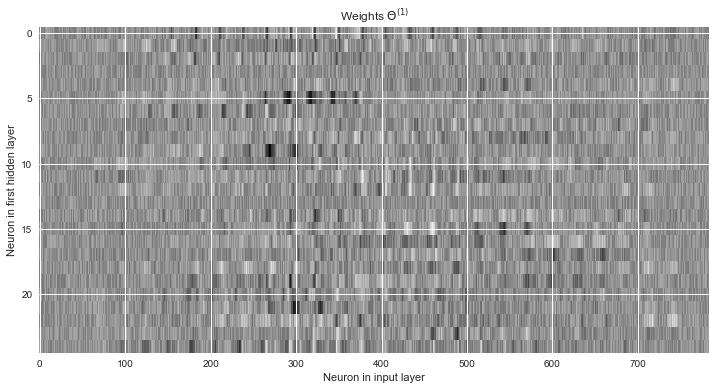

In [49]:
# How the input layer influences the first hidden layer
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.imshow(np.transpose(clf.coefs_[0]), cmap=plt.get_cmap("gray"), aspect="auto")
plt.xlabel("Neuron in input layer")
plt.ylabel("Neuron in first hidden layer")
plt.title("Weights $\Theta^{(1)}$")

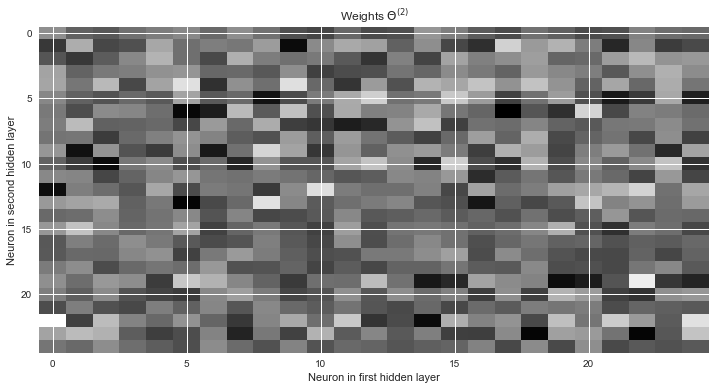

In [50]:
# How the first hidden layer influences the second hidden layer
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.imshow(np.transpose(clf.coefs_[1]), cmap=plt.get_cmap("gray"), aspect="auto")
plt.xlabel("Neuron in first hidden layer")
plt.ylabel("Neuron in second hidden layer")
plt.title("Weights $\Theta^{(2)}$")

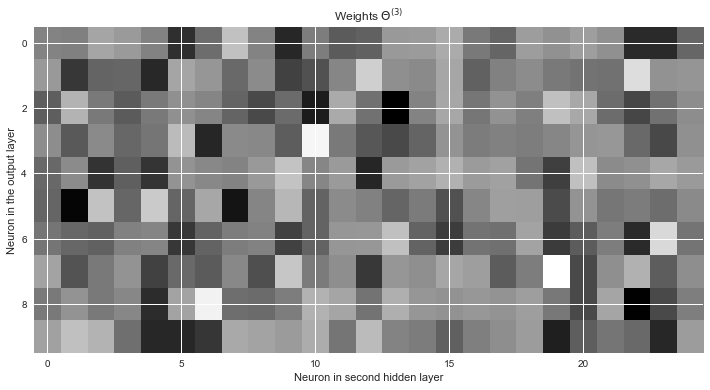

In [51]:
# How the second hidden layer influences the output layer
fig, ax = plt.subplots(1, 1, figsize=(12,6))
ax.imshow(np.transpose(clf.coefs_[2]), cmap=plt.get_cmap("gray"), aspect="auto")
plt.xlabel("Neuron in second hidden layer")
plt.ylabel("Neuron in the output layer")
plt.title("Weights $\Theta^{(3)}$")

## Using a Neural Network on a Different Data Set

Let's use the neural network on the non-linear classification problem we tackled in the Non-Linear Logistic Regression notebook. Note that it's a small data set with only 94 samples total.

In [52]:
# Unpickle the file
import cPickle as pickle
pkl_file_path = os.getcwd() + '/Data/ex2data2.pkl'
X2_train, X2_test, y2_train, y2_test = pickle.load( open( pkl_file_path, "rb" ) )

In [53]:
X2_train[0:3,:]

array([[ 0.6273 ,  0.15863],
       [ 0.63882, -0.24342],
       [ 0.322  ,  0.5826 ]])

In [54]:
y2_train[0:3]

array([1, 1, 1])

The data set here is the one where we have two input measurements (suitably normalized) and one output. So it's a binary classifier that we need. We'll set up our neural network to reflect this structure. The nice thing is we can use the *same* hidden layer structure as before to do our work -- the classifier is smart enough to recognize and adjust for the differences in dimension of the inputs and the outputs.

In [75]:
# We need a binary classifier because we have to classify results into 1 of 2 categories -- Accepted or Rejected.

# As a reminder, here is the classifier we've been using for the MNIST dataset
# **********************
#from sklearn.neural_network import MLPClassifier
# Hidden layers are specified as follows
# (n1, ) means n1 units and 1 hidden layer
# (n1, n2) means n1 units in the first hidden layer and n2 units in the second hidden layer
# (n1, n2, n3) maeans n1 units in the first hidden layer, n2 units in the second hidden layer,
#    and n3 units in the third hidden layer
# Experiment with max_iter -- set it to 10, 50, 100, 200 to see how the neural network behaves

# Here is our modified neural network classifier for our new dataset
# Note that the solver is now lbfgs instead of sdg; everything else is the same
clf2 = MLPClassifier(solver='lbfgs', alpha=1e-3, 
                       hidden_layer_sizes=(25, 25), activation='logistic', random_state=1, verbose=False, max_iter=100)
# ***********************

# We'll now fit the same classifier to the new dataset
clf2.fit(X2_train, y2_train) 

MLPClassifier(activation='logistic', alpha=0.001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(25, 25), learning_rate='constant',
       learning_rate_init=0.001, max_iter=100, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=1, shuffle=True,
       solver='lbfgs', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

AttributeError: 'MLPClassifier' object has no attribute 'loss_curve_'

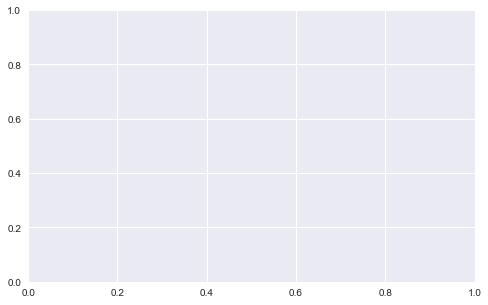

In [76]:
# How quickly is the classifier learning?
# NOTE: There is no loss curve in scikit learn for the lbfgs solver
fig, ax = plt.subplots(figsize=(8,5))
plt.plot(clf2.loss_curve_)

In [77]:
# How well does the classifer perform?
print("Training set score: %f" % clf2.score(X2_train, y2_train))
print("Test set score: %f" % clf2.score(X2_test, y2_test))

Training set score: 0.861702
Test set score: 0.791667


In [78]:
# Get the predictions for the test set
preds = clf2.predict(X2_test)

In [79]:
actual_vals = y2_test

In [142]:
clf2.coefs_[0]

array([[ -6.57025316,   2.68346194,   0.28711258,  -3.88773512,
        -10.14363128,  -1.16880082,   7.00524474,  -8.6968222 ,
          5.07962031,  -0.07386464,   3.83456314,   9.85717302,
         -2.64616602,   9.7510096 ,  -9.78964483,  -0.32916131,
         -0.17690479,   6.79298204, -10.15043328,   2.12995857,
          5.8046545 ,  -9.8877325 ,   2.58891027,   1.88405687,
         13.91909413],
       [ -1.37682439,   5.34852519,  -2.55094731,   2.82775377,
         -2.18572469,   2.14075559,  -6.52705459,  -0.91595072,
         -3.59683687,  -2.4222376 ,   1.02872404,  -2.40659159,
         -9.02071837,   6.61333491,  -0.97416267,  -4.40310475,
         -6.504962  ,  -3.04334077,  -1.97496958,  -2.16305082,
         -0.52231836,   7.80187705,  -1.47104396,   4.8639376 ,
          0.60317118]])

In [143]:
clf2.intercepts_[0]

array([  4.10688885, -10.17300306,   1.51602376,   4.98557139,
        -0.79988721,  -1.21228857,  -2.20191397,   6.01843262,
        -2.67615117,   1.08335533,   0.3000416 , -17.54485517,
         9.47753997,   1.49824276,  11.63616736,   4.15661872,
        11.72511025,   6.52489821,   0.61375258,   1.89542511,
        -4.62534375,   4.19035648,   0.18387637,   2.37806404, -12.14763907])

### Drawing the Classifier's Boundary

We've seen that the classifer does OK -- about 80% in accuracy. Let's visualize the classifier's boundary.

In [81]:
# Contour plot of the decision boundary
# Make grid values
xx1, xx2 = np.mgrid[-1:1.5:.02, -1:1.5:.02]

In [82]:
# Create the grid
grid = np.c_[xx1.ravel(), xx2.ravel()]
grid.shape

(15625, 2)

In [91]:
grid[0:4,:]

array([[-1.  , -1.  ],
       [-1.  , -0.98],
       [-1.  , -0.96],
       [-1.  , -0.94]])

In [83]:
# Get the prediction for each grid value
preds = clf2.predict(grid)

In [93]:
# number of ones predicted
pred_ones = (preds != np.zeros(15625)).sum()

# number of zeroes predicted
pred_zeros = (preds == np.zeros(15625)).sum()

pred_ones, pred_zeros

(4002, 11623)

In [96]:
# For the test dataset, segment the Accepted from the Rejected
accepted = []
rejected = []
for i in range(len(X2_test)):
    if y2_test[i] == 1:
        accepted.append(X2_test[i])
    else:
        rejected.append(X2_test[i])

In [118]:
np.array(accepted)[:,0]

array([-0.21947 , -0.51325 ,  0.57546 ,  0.46601 ,  0.38537 , -0.17339 ,
        0.52938 ,  0.64459 , -0.16187 ,  0.051267,  0.2932  , -0.20795 ])

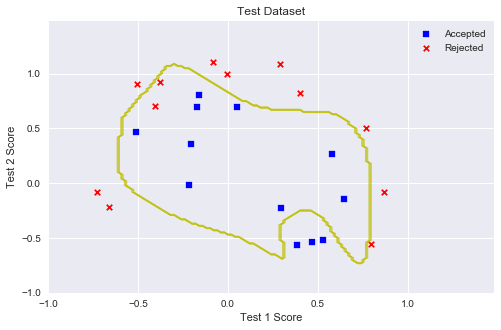

In [120]:
#plt.contour(xx1,xx2,np.array(probs_to_binary).reshape(xx1.shape))
fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(np.array(accepted)[:,0], np.array(accepted)[:,1], s=30, c='b', marker='s', label='Accepted')
ax.scatter(np.array(rejected)[:,0], np.array(rejected)[:,1], s=30, c='r', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test 1 Score')
ax.set_ylabel('Test 2 Score')
ax.set_title('Test Dataset')
plt.contour(xx1,xx2,preds.reshape(xx1.shape), colors='y', linewidths=0.5)

We see that the neural network has produced a rather complex boundary even without us manufacturing any polynomials. Indeed, neural networks are great when you have a complicated non-linear boundary to draw in order to classify your dataset. But you need a lot more data for the network to become good at finding the right boundary -- the boundary that will give the best classification results.